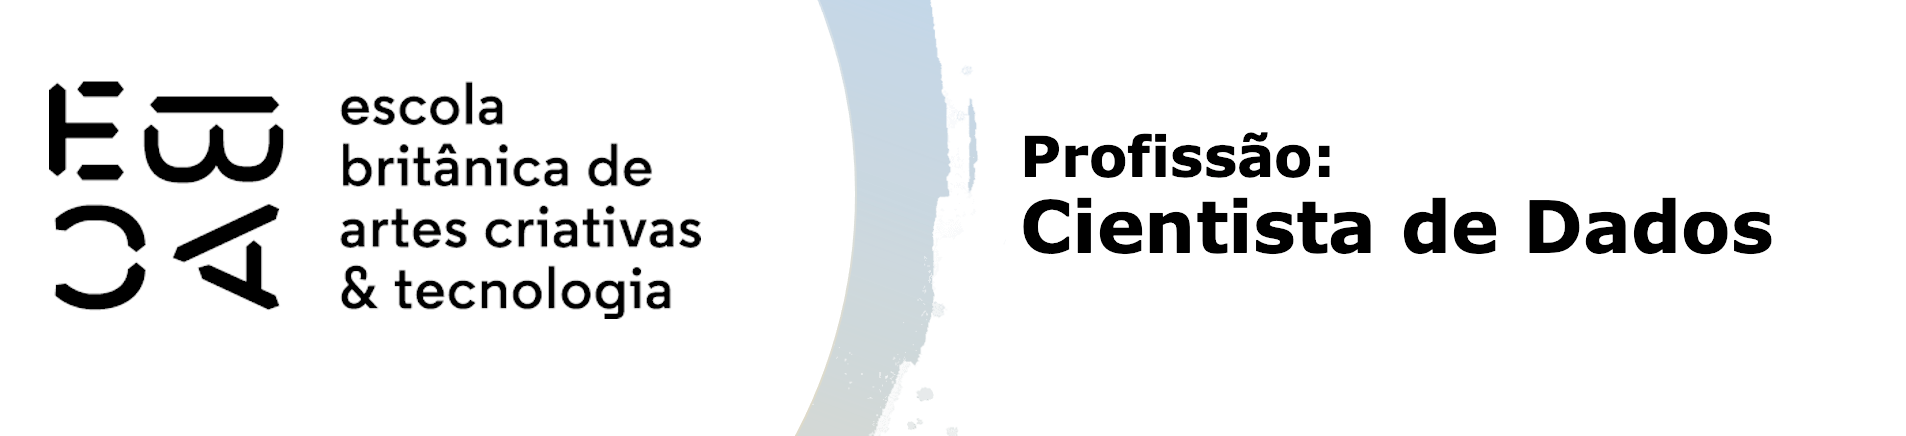

# Métodos hierárquicos de agrupamento - Tarefa

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

import scipy.cluster.hierarchy as shc

## 1) Repetindo o que fizemos em aula

Primeiramente vamos repetir o que fizemos em aula com a base de pinguins.

1. Selecione as variáveis quantitativas da base de pinguins
2. Elimine valores faltantes
3. Padronize as variáveis para média zero e desvio padrão 1
4. Faça um agrupamento hierárquico dividindo essa base em 3 grupos
5. Faça o Dendrograma

In [3]:
# Selecione as variáveis quantitativas da base de pinguins e Elimine valores faltantes
peng = sns.load_dataset('penguins')
peng.index.name='id'
peng_num = peng.select_dtypes(include='number').dropna()
peng_num

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
id,,,,
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0
...,...,...,...,...
338,47.2,13.7,214.0,4925.0
340,46.8,14.3,215.0,4850.0
341,50.4,15.7,222.0,5750.0


In [6]:
# Mostrando que não há valores faltantes
peng_num.isna().sum()

bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
dtype: int64

In [7]:
#Padronize as variáveis para média zero e desvio padrão 1
padronizador = StandardScaler()
peng_pad = padronizador.fit_transform(peng_num)

In [8]:
# Faça um agrupamento hierárquico dividindo essa base em 3 grupos
clus = AgglomerativeClustering(linkage="complete", 
                                 distance_threshold = None, 
                                 n_clusters=3)
# Fazendo o treinamento
clus.fit(peng_pad)

# marcando os rótulos na base de treinamento utilizando o atributo labels_
peng_num['grupo'] = clus.labels_

# Fanzendo a junção da base oringal com a base de treino
peng = peng.merge(peng_num['grupo'], how='left', on='id')

peng.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,grupo
id,,,,,,,,
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,1.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,1.0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,1.0


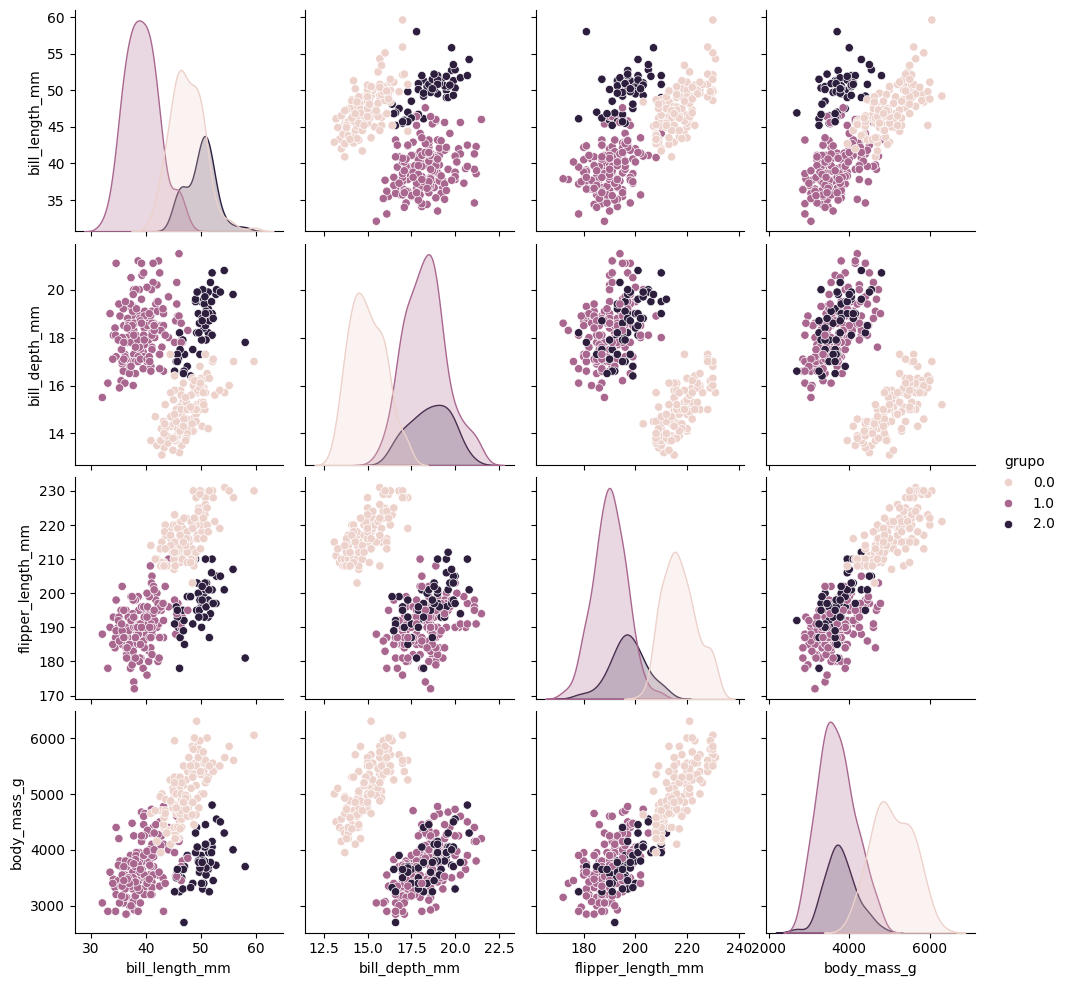

In [13]:
# Visualizando os trés grupos
sns.pairplot(data=peng, hue='grupo')

In [14]:
pd.crosstab(peng['species'], peng['grupo'])

grupo,0.0,1.0,2.0
species,,,
Adelie,0,151,0
Chinstrap,0,14,54
Gentoo,123,0,0


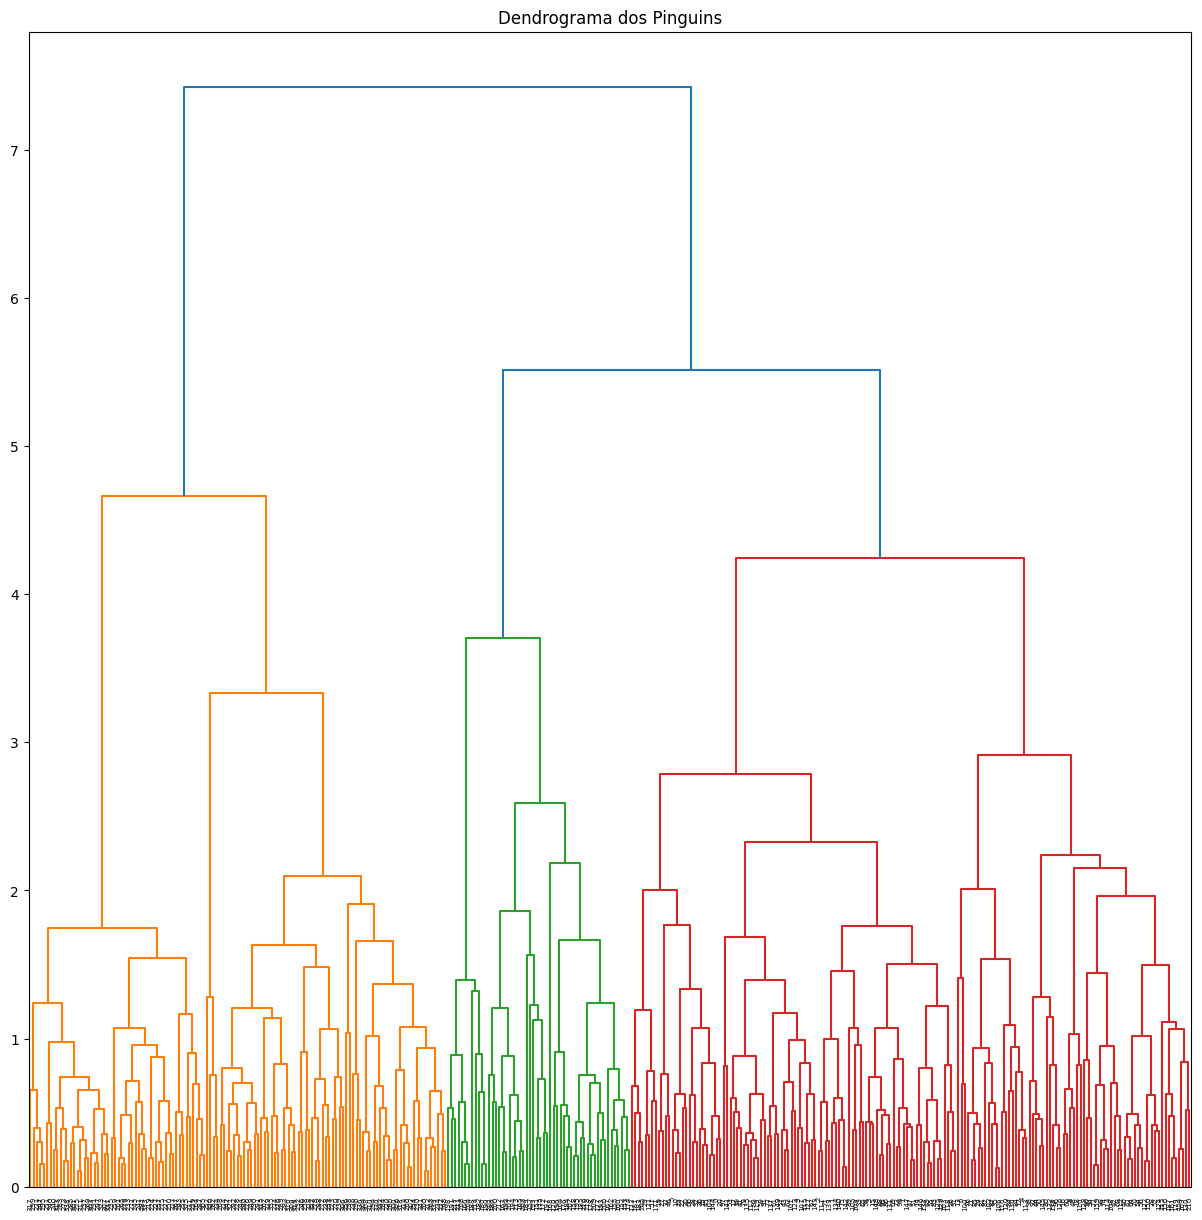

In [29]:
# Faça o Dendrograma

df = peng.select_dtypes('number').dropna()
df_pad = StandardScaler().fit_transform(df)

plt.figure(figsize=(15, 15))

plt.title("Dendrograma dos Pinguins")

dend = shc.dendrogram(shc.linkage(df_pad, method='complete'))

# Salvar a imagem do dendrograma
plt.savefig('dendrograma_pinguins.png')

# Exibir o gráfico
plt.show()

## 2) Avalie os grupos

Descreva os grupos:

- Quantos pinguins de cada espécie há em cada grupo?
- Descreva as variáveis quantitativas de cada grupo com as técnicas que você preferir.

In [22]:
# Contar o número de pinguins em cada grupo
cluster_counts = peng['grupo'].value_counts().sort_index()

# Exibir a contagem de pinguins em cada grupo
for i, cl in enumerate(cluster_counts):
    print(f'O grupo {i} tem {cl} pinguins')

O grupo 0 tem 123 pinguins
O grupo 1 tem 165 pinguins
O grupo 2 tem 54 pinguins


In [26]:
# Descrever as variáveis quantitativas de cada grupo
peng.groupby('grupo').describe().transpose()


grupo                            0.0          1.0          2.0
bill_length_mm    count   123.000000   165.000000    54.000000
                  mean     47.504878    39.283030    49.935185
                  std       3.081857     3.072471     2.659916
                  min      40.900000    32.100000    45.200000
                  25%      45.300000    37.000000    48.200000
                  50%      47.300000    39.100000    50.250000
                  75%      49.550000    41.100000    51.375000
                  max      59.600000    47.600000    58.000000
bill_depth_mm     count   123.000000   165.000000    54.000000
                  mean     14.982114    18.304242    18.568519
                  std       0.981220     1.197831     1.153473
                  min      13.100000    15.500000    16.400000
                  25%      14.200000    17.400000    17.825000
                  50%      15.000000    18.300000    18.700000
                  75%      15.700000    19.000000    19.500000
                  max      17.300000    21.500000    20.800000
flipper_length_mm count   123.000000   165.000000    54.000000
                  mean    217.186992   190.048485   197.055556
                  std       6.484976     6.448488     7.032047
                  min     203.000000   172.000000   178.000000
                  25%     212.000000   186.000000   193.000000
                  50%     216.000000   190.000000   197.000000
                  75%     221.000000   195.000000   201.000000
                  max     231.000000   210.000000   212.000000
body_mass_g       count   123.000000   165.000000    54.000000
                  mean   5076.016260  3688.181818  3779.629630
                  std     504.116237   449.767586   387.848263
                  min    3950.000000  2850.000000  2700.000000
                  25%    4700.000000  3350.000000  3556.250000
                  50%    5000.000000  3650.000000  3737.500000
                  75%    5500.000000  3950.000000  4037.500000
                  max    6300.000000  4775.000000  4800.000000

    Grupo 0: Possui pinguins com bicos mais longos e profundos, nadadeiras mais compridas e maior massa corporal.
    Grupo 1: Caracteriza-se por pinguins com bicos mais curtos e profundos, nadadeiras mais curtas e menor massa corporal.
    Grupo 2: Inclui pinguins com comprimentos de bico e profundidade intermediários, nadadeiras relativamente curtas e massa corporal intermediária.

## 3) Alterando o agrupamento

O Dendrogarma sugere que podemem haver grupos interessantes se solicitarmos mais que 3 grupos. Se quisermos testar o agrupamento com mais de 3 grupos, quantos grupos o Dendrograma te sugere? (Dica: não faça mais que 6 grupos).

- Faça o agrupamento hierárquico semelhante ao anterior, mas com o número de grupos que você escolheu.
- Analise esses agrupamentos
    - Quantos pinguins de cada espécie há em cada grupo?
    - Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?
- Na sua opinião, o agrupamento capturou algum padrão natural dos dados? Qual?

In [40]:
# Selecione as variáveis quantitativas da base de pinguins e Elimine valores faltantes
peng2 = sns.load_dataset('penguins')
peng2.index.name='id'
peng_quant = peng2.select_dtypes(include='number').dropna()


In [41]:
#Padronize as variáveis para média zero e desvio padrão 1
padronizador = StandardScaler()
peng_norm= padronizador.fit_transform(peng_quant)

In [42]:
# Faça um agrupamento hierárquico dividindo essa base em 3 grupos
clus = AgglomerativeClustering(linkage="complete", 
                                 distance_threshold = None, 
                                 n_clusters=5)
# Fazendo o treinamento
clus.fit(peng_norm)

# marcando os rótulos na base de treinamento utilizando o atributo labels_
peng_quant['grupo5'] = clus.labels_

# Fanzendo a junção da base oringal com a base de treino
peng2 = peng2.merge(peng_quant['grupo5'], how='left', on='id')


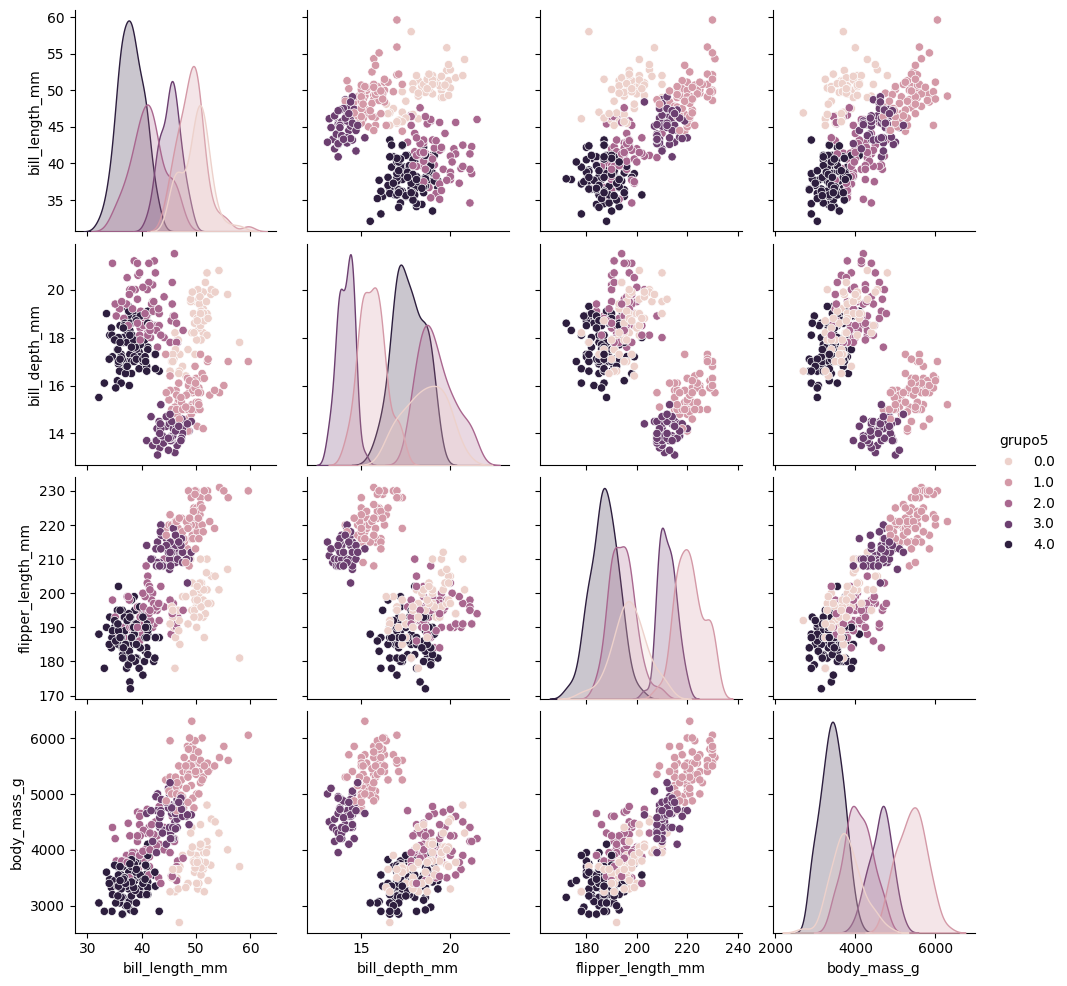

In [43]:
# Visualizando os trés grupos
sns.pairplot(data=peng2, hue='grupo5')

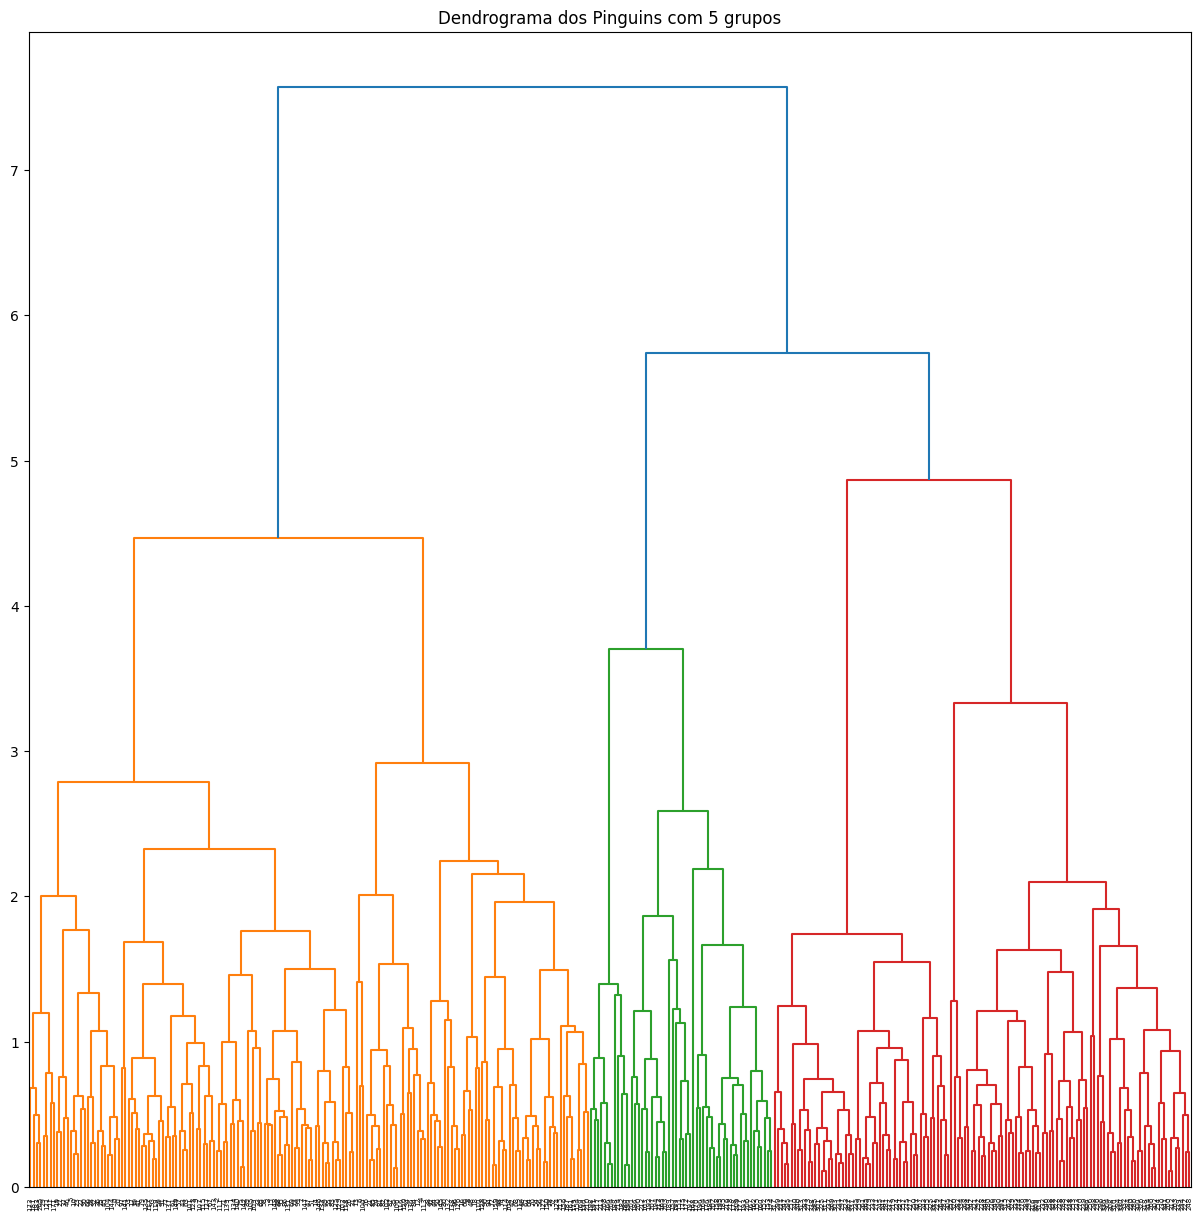

In [45]:
df = peng2.select_dtypes('number').dropna()
df_pad2 = StandardScaler().fit_transform(df)

plt.figure(figsize=(15, 15))

plt.title("Dendrograma dos Pinguins com 5 grupos")

dend2 = shc.dendrogram(shc.linkage(df_pad2, method='complete'))

# Salvar a imagem do dendrograma
plt.savefig('dendrograma_pinguins_5grupos.png')

# Exibir o gráfico
plt.show()

Quantos pinguins de cada espécie há em cada grupo?

In [48]:
# Contar o número de pinguins em cada grupo
cluster_counts = peng2['grupo5'].value_counts().sort_index()

# Exibir a contagem de pinguins em cada grupo
for i, cl in enumerate(cluster_counts):
    print(f'No grupo {i} tem {cl} pinguins')

No grupo 0 tem 54 pinguins
No grupo 1 tem 71 pinguins
No grupo 2 tem 69 pinguins
No grupo 3 tem 52 pinguins
No grupo 4 tem 96 pinguins


In [47]:
pd.crosstab(peng2['species'], peng2['grupo5'])

grupo5,0.0,1.0,2.0,3.0,4.0
species,,,,,
Adelie,0,0,60,0,91
Chinstrap,54,0,9,0,5
Gentoo,0,71,0,52,0


Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?

In [51]:
# Contar o número de pinguins de cada espécie, machos e fêmeas, em cada grupo
species_sex_counts = peng2.groupby(['grupo5', 'species', 'sex']).size().unstack(fill_value=0)
species_sex_counts

sex               Female  Male
grupo5 species                
0.0    Chinstrap      20    34
1.0    Gentoo          9    61
2.0    Adelie          4    55
       Chinstrap       9     0
3.0    Gentoo         49     0
4.0    Adelie         69    18
       Chinstrap       5     0

Na sua opinião, o agrupamento capturou algum padrão natural dos dados? Qual?

Ao analisar o número de pinguins de cada espécie e sexo em cada grupo, conforme solicitado anteriormente, o dendrograma e o agrupamento hierárquico parecem ter capturado padrões naturais nos dados que se correlacionam com as espécies e, em alguns casos, com o sexo dos pinguins. Os grupos formados mostram uma separação clara entre as espécies e também uma distinção entre machos e fêmeas em algumas espécies. Por exemplo, os grupos de fêmeas Gentoo estão separados dos machos Gentoo e de outras espécies, o que sugere que existem diferenças morfológicas significativas entre esses subgrupos.